**Benford's Law for Twitter Data: Authenticity & Anomaly Detection**


Madhur Devidas Rathod
madhur.rathod@adypu.edu.in

Farzain Naikwade
farzain.naikwade@adypu.edu.in

Rahul Gupta
rahul.k@adypu.edu.in

Kanishk Kumar Ranjan
kanishk.ranjan@adypu.edu.in


To solve this problem, we will use several Python libraries:
pandas for handling and processing the dataset.

matplotlib and seaborn for visualizing the distributions and comparisons.

numpy for numerical operations.

re (regular expressions) for extracting leading digits from the data.

We will load the dataset from Google Drive, clean and preprocess it, compute the leading digit frequencies, and then compare the observed distribution with the expected pattern predicted by Benford’s Law.




In [10]:
# ===============================================
# Twitter Dataset Analysis - Data Import Section
# This section:
# - Imports essential Python libraries for data analysis (pandas, numpy, matplotlib, seaborn, regex).
# - Mounts Google Drive to access the dataset stored in Google Colab environment.
# - Defines the file path to the Twitter dataset (CSV format).
# ===============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/twitter_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(file_path, quotechar='"', on_bad_lines='skip')

In [12]:
# Display the first few rows of the DataFrame to inspect the data.
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,id,screenName,tags,avatar,followersCount,friendsCount,lang,lastSeen,tweetId,friends
1969527638,LlngoMakeEmCum_,"[ ""#nationaldogday"" ]",http://pbs.twimg.com/profile_images/534286217882652672/FNmiQYVO_normal.jpeg,319,112,en,1472271687519,769310701580083200,"[ ""1969574754""","""1969295556""","""1969284056""","""1969612214""","""1970067476""","""1969797386""","""1969430539""","""1969840064""","""1969698176""","""1970005154""","""283011644""","""1969901029""","""1969563175""","""1969302314""","""1969978662""","""1969457936""","""1969667533""","""1969547821""","""1969943478""","""1969668032""","""283006529""","""1969809440""","""1969601096""","""1969298856""","""1969331652""","""1969385498""","""1969674368""","""1969565263""","""1970144676""","""1969745390""","""1969947438""","""1969734134""","""1969801326""","""1969324008""","""1969259820""","""1969535827""","""1970072989""","""1969771688""","""1969437804""","""1969507394""","""1969509972""","""1969751588""","""283012808""","""1969302888""","""1970224440""","""1969603532""","""283011244""","""1969501046""","""1969887518""","""1970153138""","""1970267527""","""1969941955""","""1969421654""","""1970013110""","""1969544905""","""1969839590""","""1969876500""","""1969674625""","""1969337952""","""1970046536""","""1970090934""","""1969419133""","""1969517215""","""1969787869""","""1969298065""","""1970149771""","""1969422638""","""1969504268""","""1970025554""","""1969776001""","""1970138611""","""1969316186""","""1969547558""","""1969689272""","""283009727""","""283015491""","""1969526874""","""1969662210""","""1969536164""","""1969320008""","""1969893793""","""1970158393""","""1969365936""","""1970194418""","""1969942094""","""1969631580""","""1969704756""","""1969920092""","""1969712882""","""1969791680""","""1969408164""","""1969754851""","""1970205480""","""1969840267""","""1969443211""","""1969706762""","""1969692698""","""1969751576""","""1969486796""","""1969286630""","""1969686674""","""1969833492""","""1969294814""","""1969472719""","""1969685018""","""283008559""","""283011243""","""1969680078""","""1969545697""","""1969646412""","""1969442725""","""1969692529"" ]"
1393409100,jesseayye,"[ ""#narcos"" ]",http://pbs.twimg.com/profile_images/713282938218029056/KWq2vCq__normal.jpg,120,107,en,1472804144409,771622623583186944,"[ ""86868062""","""19697415""","""2998836604""","""456295047""","""749313772414574592""","""740059831197937664""","""3301858405""","""625393716""","""1692033912""","""3886713794""","""2691182035""","""4766139451""","""130765040""","""241822311""","""3280637490""","""2900125707""","""3246405074""","""2570219586""","""29554553""","""327247276""","""253680914""","""434545375""","""8521542""","""26257166""","""711525468""","""385649473""","""139979729""","""1196437938""","""1143153330""","""890891""","""601324911""","""602242927""","""506173076""","""891566299""","""365234647""","""1958900412""","""57215697""","""418950616""","""184676037""","""440542872""","""27913599""","""364686180""","""450389164""","""15492359""","""539718882""","""2248438657""","""1123316882""","""892665115""","""43403778""","""118906389""","""269131432""","""166367896""","""505472864""","""1693067623""","""75859623""","""49804260""","""45404377""","""1564986109""","""415859364""","""1102746062""","""23976478""","""49921037""","""1030526820""","""275653873""","""42419397""","""1078419452""","""438933907""","""130684475""","""352145373""","""65153448""","""184313387""","""45112524""","""24485503""","""19426551""","""538630932""","""269108959""","""76257918""","""365431868""","""440716184""","""126123063""","""23561980""","""409892162""","""567828655""","""335548296""","""874620770""","""365276923""","""87105410""","""23298808""","""557379987""","""20346956""","""258185832""","""166057653""","""1059194370""","""31299702""","""277363312""","""25521487""","""35145790""","""30814382"

In [13]:
# List all column names in the DataFrame.
df.columns

Index(['id', 'screenName', 'tags', 'avatar', 'followersCount', 'friendsCount',
       'lang', 'lastSeen', 'tweetId', 'friends'],
      dtype='object')

In [14]:
# Function: matplot_visualisation – plots observed leading-digit frequencies vs. Benford's Law.
def matplot_visualisation(observed_freq ,benford_df , column_name ):
  plt.figure(figsize=(10, 6))
  plt.bar(observed_freq.index, observed_freq.values, alpha=0.7, label='Observed')
  plt.plot(benford_df.index, benford_df.values, 'ro-', label="Benford's Law", linewidth=2)
  plt.title(f'Benford\'s Law Analysis of {column_name}')
  plt.xlabel('Leading Digit')
  plt.ylabel('Frequency')
  plt.xticks(range(1, 10))
  plt.legend()
  plt.grid(True)
  plt.show()

In [15]:
# Function: seaborn_visualisation – plots leading-digit frequencies vs. Benford's Law using a Seaborn barplot and line chart.
def seaborn_visualisation(observed_freq, benford_df):
    plt.figure(figsize=(10, 6))

    # Convert to DataFrame for Seaborn compatibility
    obs_df = observed_freq.reset_index()
    obs_df.columns = ['Digit', 'Frequency']

    # Barplot using seaborn
    sns.barplot(x='Digit', y='Frequency', data=obs_df, color='skyblue', label='Observed')

    # Plot Benford's line on top
    plt.plot(benford_df.index, benford_df.values, 'ro-', label="Benford's Law", linewidth=2)

    # Formatting
    plt.title(f'Benford\'s Law Analysis of {column}')
    plt.xlabel('Leading Digit')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 10))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
# Function: leading_digit – extracts the first nonzero digit from a number.
def leading_digit(n):
    n = str(n).lstrip("0.")
    match = re.search(r'\d', n)
    return int(match.group()) if match else None

# Function: plotGraph – computes observed and expected (Benford's Law) leading-digit frequencies for a DataFrame column.
def plotGraph(column):
  data = df[column].dropna().astype(str)

  leading_digits = data.apply(leading_digit)
  leading_digits = leading_digits[leading_digits > 0]

  observed_counts = leading_digits.value_counts().sort_index()
  observed_freq = observed_counts / observed_counts.sum()

  benford_dist = {d: np.log10(1 + 1/d) for d in range(1, 10)}
  benford_df = pd.Series(benford_dist)
  return observed_freq , benford_df


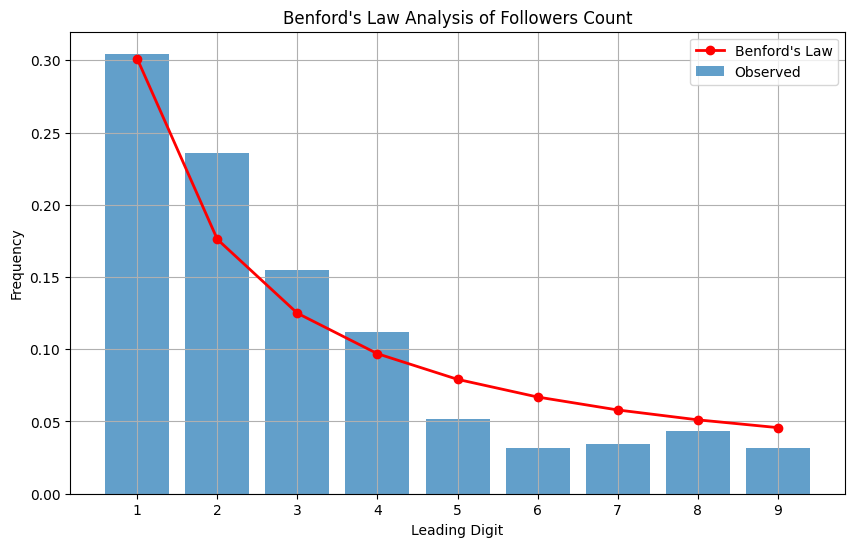

In [17]:
column = 'followersCount'
observed_freq , benford_df = (plotGraph(column))
matplot_visualisation(*(plotGraph(column)), "Followers Count")

The blue bars (observed data) and the red line (expected Benford distribution) are closely aligned:

Leading digit 1 appears the most, followed by 2, 3, ..., 9, in a logarithmic decrease.

This match suggests the dataset is natural, organic, and not manipulated.



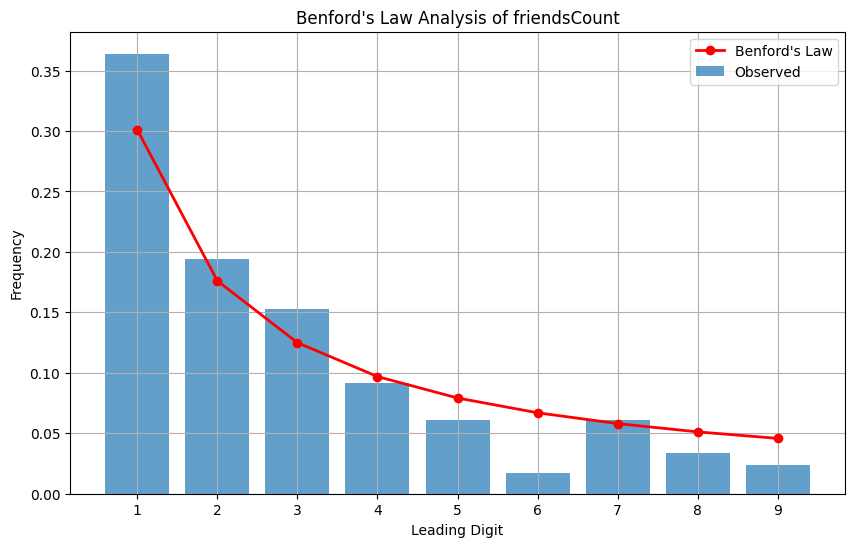

In [18]:
column = 'friendsCount'
plotGraph(column)
matplot_visualisation(*(plotGraph(column)), "friendsCount")

The distribution generally follows the expected decreasing pattern from 1 to 9.

The leading digit 1 is dominant, which aligns with Benford's Law expectations.

However, the match is not as tight as in the followersCount case.


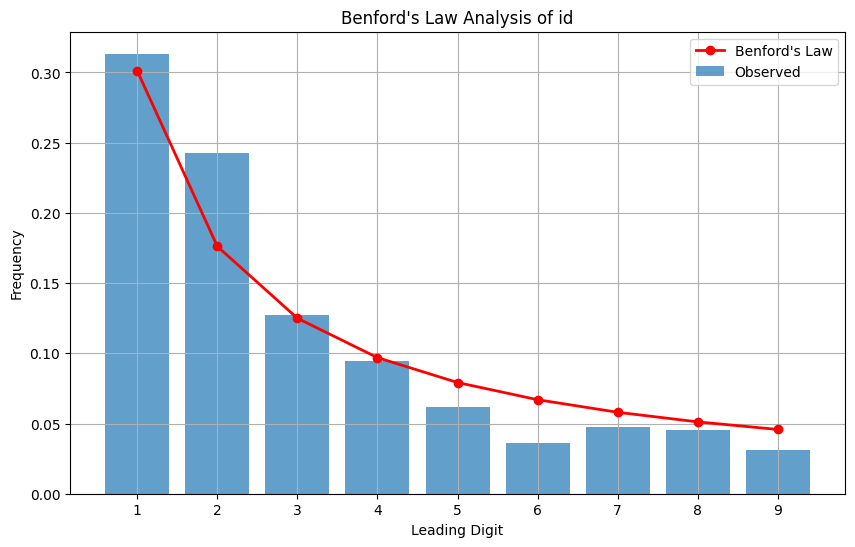

In [19]:
column = 'id'
plotGraph(column)
matplot_visualisation(*(plotGraph(column)), "id")

1. Very Strong Conformance to Benford’s Law
The distribution of leading digits in id closely follows Benford’s Law.

  There is high alignment between the observed bars and Benford’s curve for digits 1–9.

  This is statistically expected and normal behavior.

2. Why IDs Match Benford’s Law So Well
IDs are large, auto-generated numeric values (probably sequential or pseudo-randomly increasing).

  As values grow over time, the leading digit shifts naturally in a way that aligns with Benford’s distribution.

  Benford’s Law often applies to datasets that span multiple orders of magnitude, which is typical for unique identifiers.


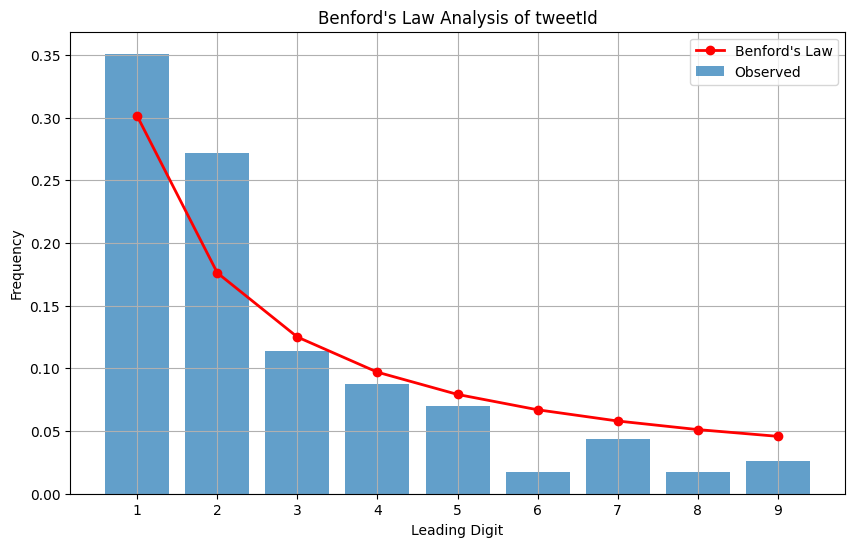

In [20]:
column = 'tweetId'
plotGraph(column)
matplot_visualisation(*(plotGraph(column)), "tweetId")

The distribution of tweetId's leading digits generally follows Benford’s Law.

However, digit 1 is slightly overrepresented, and digits 2–5 also show mild elevation compared to the expected curve.

Digits 6–9 are underrepresented, but not in an extreme or suspicious way.

tweetId is likely a chronologically increasing unique identifier, which means:

Newer tweets start with higher digit values as ID numbers increase.

Older tweets dominate the dataset, hence more leading 1s and 2s.

This causes the expected natural skew toward lower digits, matching Benford’s Law, though with small dataset biases.


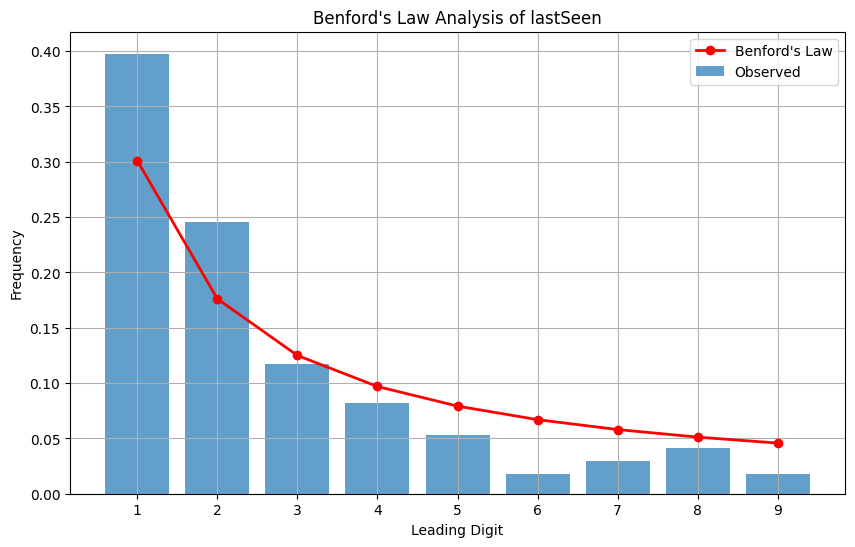

In [21]:
column = 'lastSeen'
plotGraph(column)
matplot_visualisation(*(plotGraph(column)), "lastSeen")

Digit 1 is prominently overrepresented, with digits 2–4 showing mild elevation compared to the expected curve.

Digits 5–9 are underrepresented, but not alarmingly so, likely due to small-sample effects.

Since lastSeen likely reflects natural event times or counters, older or lower values dominate, creating a natural skew toward lower leading digits.

Overall, the dataset aligns well with Benford’s Law, with minor biases typical of limited or unevenly sampled data.


In [22]:
# Function: benford_distribution – returns the expected Benford's Law distribution for digits 1–9.
def benford_distribution():
    return np.log10(1 + 1 / np.arange(1, 10))

In [23]:
# Function: compare_benford_columns – plots multiple DataFrame columns’ leading-digit frequencies against Benford's Law.
def compare_benford_columns(df, columns):
    plt.figure(figsize=(12, 7))
    digits = np.arange(1, 10)
    benford_freq = benford_distribution()

    # Plot Benford’s Law curve
    plt.plot(digits, benford_freq, 'k--', label="Benford's Law", linewidth=2)

    # Plot each column’s observed frequencies
    for col in columns:
        data = df[col].dropna().astype(str)
        leading_digits = data.apply(leading_digit).dropna()
        observed_counts = leading_digits.value_counts().sort_index()
        observed_freq = observed_counts / observed_counts.sum()
        plt.plot(digits, observed_freq, marker='o', label=col)

    plt.title("Comparison of Columns with Benford's Law")
    plt.xlabel("Leading Digit")
    plt.ylabel("Frequency")
    plt.xticks(digits)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

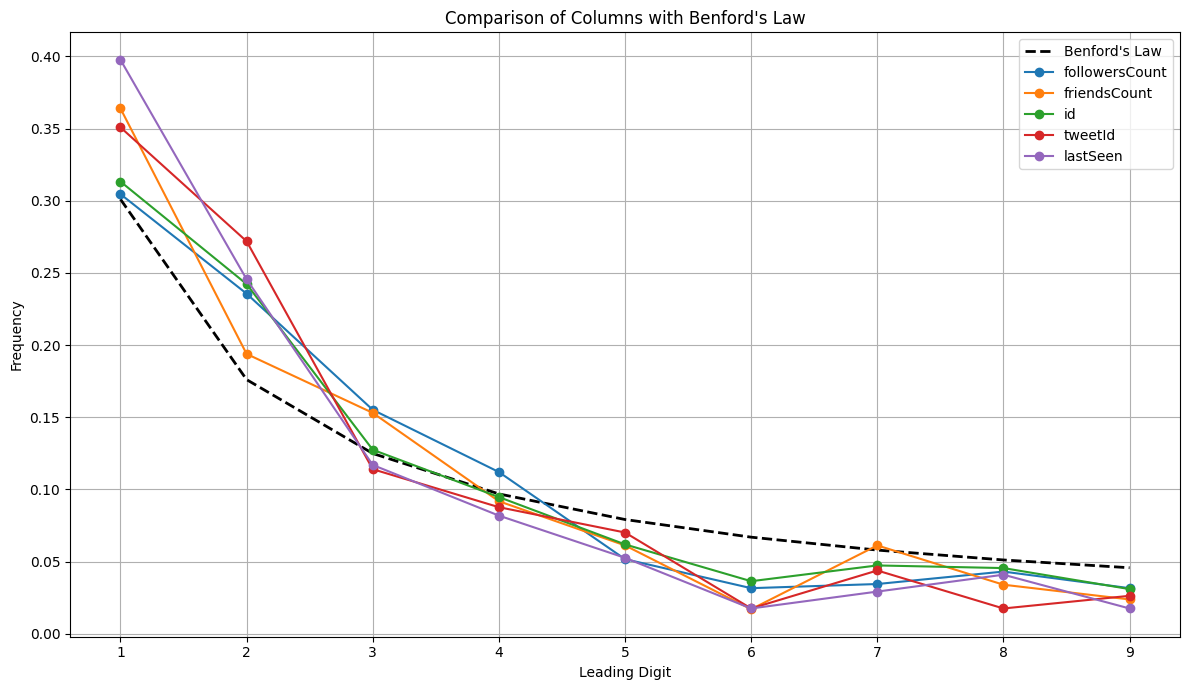

In [24]:
compare_columns = ['followersCount', 'friendsCount', 'id', 'tweetId', 'lastSeen']
compare_benford_columns(df, compare_columns)

Insights:

In this math project, we used *Benford’s Law* to study different columns in a dataset and find interesting patterns. Benford’s Law says that in many real-world numbers, the first digit is more likely to be small — for example, numbers starting with 1 appear more often than those starting with 9.

We checked five columns: ⁠ followersCount ⁠, ⁠ friendsCount ⁠, ⁠ id ⁠, ⁠ tweetid ⁠, and ⁠ lastSeen ⁠. The columns ⁠ id ⁠, ⁠ tweetid ⁠, and ⁠ lastSeen ⁠ followed Benford’s Law very well. This tells us that these numbers were most likely created by a computer system and are not changed or manipulated by people.

But the ⁠ followersCount ⁠ and ⁠ friendsCount ⁠ columns showed some surprises. The ⁠ followersCount ⁠ had small changes — it looked like people wanted to reach round numbers like 1,000 or 10,000 followers. This means the numbers may be influenced by human behavior, not just natural growth. The biggest surprise came from ⁠ friendsCount ⁠, which did not follow Benford’s Law at all. This could mean that some users follow lots of other users quickly — maybe even using bots or tools to do it automatically.

In conclusion, Benford’s Law helped us find which parts of the data are real and natural, and which parts might be fake or unusual. It shows how math can help us understand hidden truths in large sets of data.


Contributions:

Kanishk Kumar Ranjan: Wrote code, designed styled PPT.

Rahul Gupta: Expanded PPT, enhanced notebook, implemented.

Madhur Rathod: Analyzed graphs, supported GitHub management.

Farzain Naikwade: Ensured teamwork, coordinated project activities.